In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
class SimpleState(TypedDict):
    """State that flows through our graph"""
    input_text: str
    processed_text: str
    word_count: int
    status: str

In [3]:
def process_node(state):
    """Node 1: Process the input text"""
    text = state['input_text']
    processed = text.upper()
    
    state['processed_text'] = processed
    state['status'] = 'processed'
    
    return state


def count_node(state):
    """Node 2: Count words in processed text"""
    words = state['processed_text'].split()
    
    state['word_count'] = len(words)
    state['status'] = 'counted'
    
    return state

In [4]:
# Create the graph
workflow = StateGraph(SimpleState)

# Add nodes
workflow.add_node("process", process_node)
workflow.add_node("count", count_node)

# Add edges to connect nodes
workflow.add_edge(START, "process")  # Start -> process
workflow.add_edge("process", "count")  # process -> count
workflow.add_edge("count", END)  # count -> End

# Compile the graph
app = workflow.compile()

print("✓ Graph built and compiled")

✓ Graph built and compiled


In [6]:
# Get mermaid syntax
print(app.get_graph().draw_mermaid())

%%{init: {'flowchart': {'curve': 'linear'}}}%%
graph TD;
	__start__([<p>__start__</p>]):::first
	process(process)
	count(count)
	__end__([<p>__end__</p>]):::last
	__start__ --> process;
	count --> __end__;
	process --> count;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



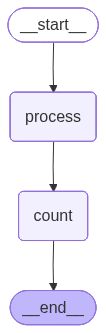

In [7]:
from IPython.display import Image, display

# Generate and display PNG
display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
# Initialize state
initial_state = {
    'input_text': 'hello world from langgraph',
    'processed_text': '',
    'word_count': 0,
    'status': 'initial'
}

# Run the graph
final_state = app.invoke(initial_state)

# Display results
print(f"Input: {final_state['input_text']}")
print(f"Processed: {final_state['processed_text']}")
print(f"Word Count: {final_state['word_count']}")
print(f"Status: {final_state['status']}")

Input: hello world from langgraph
Processed: HELLO WORLD FROM LANGGRAPH
Word Count: 4
Status: counted
